No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\dorot\AppData\Local\Temp\ipykernel_20244\4085405051.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.8])


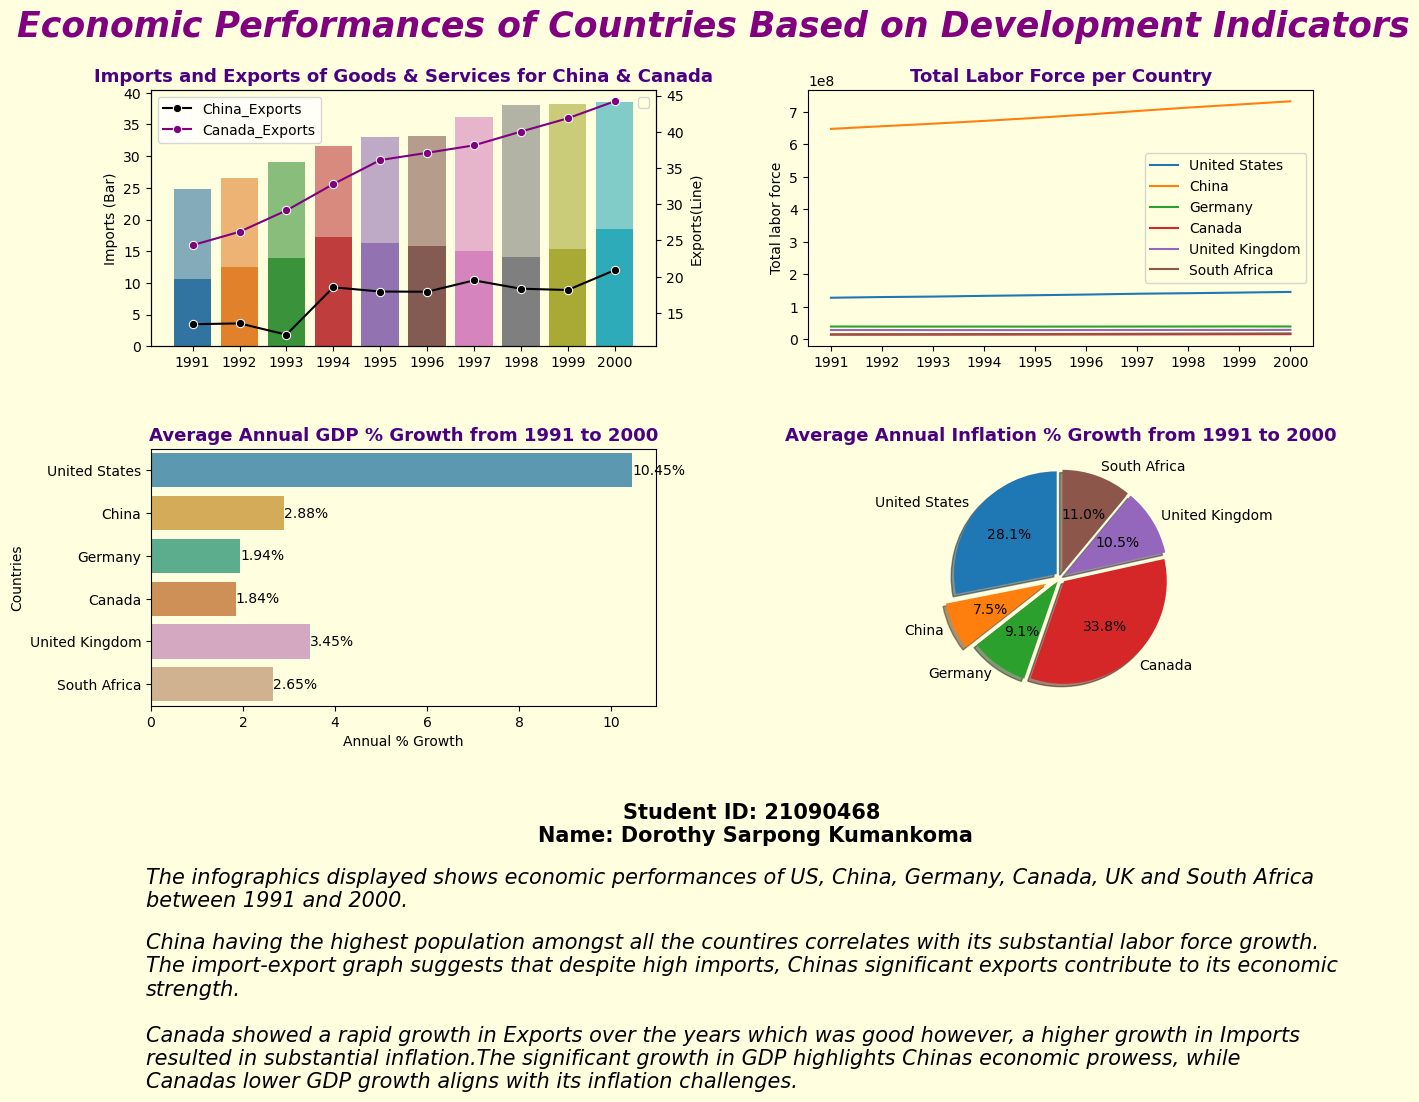

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def read_data(file):
    
    """
    This function takes in a csv file as a parameter and returns two
     dataframes, one with columns as years and the other transposed with 
     countries as years. 
    
    Parameter: 
        file: this is a CSV file read into the function
    """
   
    #Reading the CSV file and setting index as country name and series name
    df1 = pd.read_csv(file, index_col=['Series Name', 'Country Name'])
    
    #Removing the country code and series code in df1
    df1 = df1.drop(['Country Code', 'Series Code'], axis = 1)

    #Applying .to_numeric to change all values in the dataframe to floats
    df1 = df1.apply(pd.to_numeric, errors = 'coerce')
    
    #Transposing the dataframe 1 and assigning to new dataframe 2
    df2 = df1.T
         
    #Renaming the index to remove years in [] 
    df2.rename(index = {'1991 [YR1991]': '1991', '1992 [YR1992]':'1992', 
    '1993 [YR1993]': '1993', '1994 [YR1994]':'1994', '1995 [YR1995]': '1995', 
    '1996 [YR1996]': '1996', '1997 [YR1997]':'1997', '1998 [YR1998]': '1998', 
    '1999 [YR1999]': '1999', '2000 [YR2000]':'2000'}, inplace = True)           
        
    #The function returns the two dataframes df1 and df2
    return df1, df2
  
    
#Calling the function with the economic_data csv file
df1, df2 = read_data('project_data.csv')


# Defining variables for my graphs 
years = df2.index
countries = ['United States', 'China', 'Germany', 'Canada', 'United Kingdom', 'South Africa']


# Creating dataframes for all the indicators
pop = df2.xs('Population, total', level=0, axis=1)
labor_force = df2.xs('Labor force, total', level=0, axis=1)
gdp = df2.xs('GDP growth (annual %)', level=0, axis=1)
imports = df2.xs('Imports of goods and services (% of GDP)', level=0, axis=1)
exports = df2.xs('Exports of goods and services (% of GDP)', level=0, axis=1)
inflation = df2.xs('Inflation, consumer prices (annual %)', level=0, axis=1)

avg_inflation = inflation.mean()
avg_gdp = gdp.mean()

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), 
                         gridspec_kw={'hspace': 0.4}, facecolor='lightyellow')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3) 
fig.suptitle('Economic Performances of Countries Based on Development Indicators',
             fontsize=25, fontweight='bold', color='purple', fontstyle='italic')

# Subplot 1: Bar and Line plot for Imports and Exports of China
sns.barplot(y=imports['China'], x=years, alpha=1, 
            ax=axes[0, 0])
sns.barplot(y=imports['Canada'], x=years, alpha=0.6, 
            ax=axes[0, 0])
axes[0, 0].set_ylabel('Imports (Bar)')
axes2 = axes[0, 0].twinx()
sns.lineplot(y=exports['China'], x=years, ax=axes2, marker='o', label='China_Exports',
             color='black')
sns.lineplot(y=exports['Canada'], x=years, ax=axes2, marker='o', label='Canada_Exports',
             color='purple')
axes[0,0].legend(facecolor='lightyellow')
axes2.set_ylabel('Exports(Line)')
axes[0, 0].set_title('Imports and Exports of Goods & Services for China & Canada', 
                     fontsize=13, fontweight='bold', color='indigo')
axes[0,0].set(facecolor='lightyellow')



# Subplot 2: Line plot showing Total Labor Force for all countries
axes[0, 1].set_title('Total Labor Force per Country',fontsize=13, fontweight='bold', color='indigo')
for country in countries:
    sns.lineplot(x=years, y=df2['Labor force, total'][country], ax=axes[0, 1],label=country)
axes[0, 1].legend(facecolor='lightyellow')
axes[0, 1].set_ylabel('Total labor force')
axes[0,1].set(facecolor='lightyellow')

# Subplot 3: Bar plot for Average Annual GDP Growth
sns.barplot(x=avg_gdp, y=countries, ax=axes[1, 0], alpha=0.7, palette='colorblind')
axes[1, 0].set_title('Average Annual GDP % Growth from 1991 to 2000', 
                     fontsize=13, fontweight='bold', color='indigo')
axes[1, 0].set_ylabel('Countries')
axes[1, 0].set_xlabel('Annual % Growth')

# Displaying values on the bar plot
for idx, value in enumerate(avg_gdp):
    axes[1, 0].text(value, idx, f'{value:.2f}%', va='center', ha='left', fontsize=10)
axes[1,0].set(facecolor='lightyellow')

# Subplot 4: Pie chart for Average Annual Inflation Growth
axes[1, 1].set_title('Average Annual Inflation % Growth from 1991 to 2000',
                     fontsize=13, fontweight='bold', color='indigo')
explode = [0.15 if country == 'China' else 0.05 for country in countries]
axes[1, 1].pie(avg_inflation, labels=countries, autopct='%1.1f%%', startangle=90, shadow=True, explode=explode)

# Adjust layout
plt.tight_layout(rect=[0,0,1,0.8])
plt.text(12,-58, 
'Student ID: 21090468 \nName: Dorothy Sarpong Kumankoma', horizontalalignment='center',
 fontsize=15, fontweight='bold')

plt.text(-1,-67, 
'The infographics displayed shows economic performances of US, China, Germany, ' 
'Canada, UK and South Africa\nbetween 1991 and 2000.', fontsize=15, fontstyle='italic')

plt.text(-1,-92, 
'China having the highest population amongst all the countires correlates with its substantial labor force growth.\n'
'The import-export graph suggests that despite high imports, Chinas significant exports contribute to its economic \nstrength.'
'\n\nCanada showed a rapid growth in Exports over the years which was good however, a higher growth in Imports \n'
'resulted in substantial inflation.'
'The significant growth in GDP highlights Chinas economic prowess, while \nCanadas lower GDP growth aligns with '
'its inflation challenges.', fontsize=15, fontstyle='italic')


plt.savefig("21090468.png", dpi=300, bbox_inches='tight')

